In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_covid = pd.read_csv('covid.csv')
df_covid_group = pd.read_csv('covid_grouped.csv')
df_covid_death = pd.read_csv('coviddeath.csv')

In [3]:
df_covid.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,USA
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,BRA
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,RUS
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,ZAF


In [4]:
df_covid.drop(['NewCases', 'NewDeaths', 'NewRecovered'], axis=1, inplace=True)
df_covid.head()

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,USA
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,BRA
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,RUS
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,ZAF


# Top 10 Cases


In [5]:
top_ten_cases = df_covid.nlargest(10, 'TotalCases')

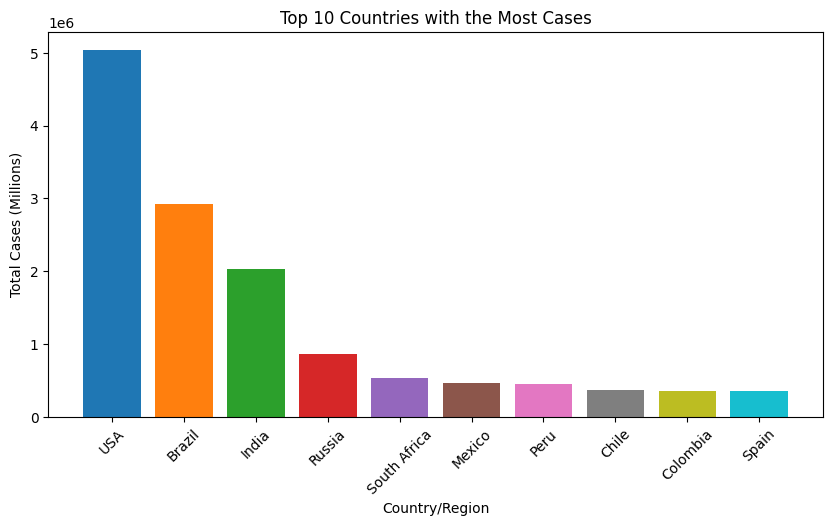

In [6]:
colors = plt.cm.tab10(np.linspace(0, 1, top_ten_cases.shape[0]))
plt.figure(figsize=(10, 5))
plt.bar(top_ten_cases['Country/Region'], top_ten_cases['TotalCases'], color=colors)
plt.xlabel('Country/Region')
plt.ylabel('Total Cases (Millions)')
plt.title('Top 10 Countries with the Most Cases')
plt.xticks(rotation=45)
plt.show()

# Scatter Plot of Total Cases and Total Death

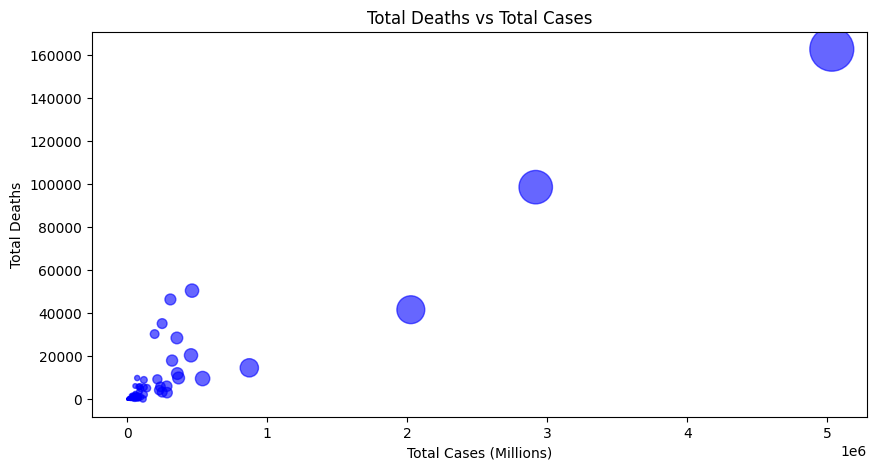

In [7]:
size_scale = 1000 / max(df_covid['TotalCases'])
sizes = df_covid['TotalCases'] * size_scale

plt.figure(figsize=(10, 5))
plt.scatter(df_covid['TotalCases'], df_covid['TotalDeaths'], s=sizes, color='blue', alpha=0.6)
plt.xlabel('Total Cases (Millions)')
plt.ylabel('Total Deaths')
plt.title('Total Deaths vs Total Cases')
plt.show()